# Simulation & Data Comparison [Validation]
### Milo @ SSL - UC Berkeley
### Jan 2020

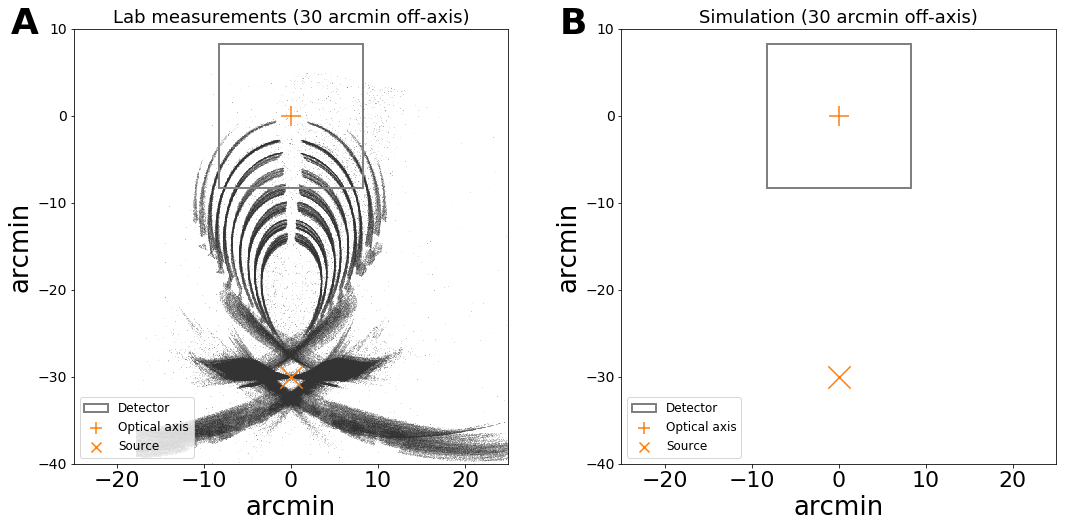

In [98]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
import matplotlib 
from astropy.io import fits
import ast
import matplotlib.patches as patches
import astropy.units as u
import skimage.transform
from foxsisim.util import load_rays
from foxsisim.detector import Detector

# SCALE
CCD_PIXEL_PITCH = 13.5 * u.micron
binning = 2.
distance = 2. * u.m
s = np.arctan(binning * CCD_PIXEL_PITCH / distance).to(u.arcmin)
resol = 1024
Dwidth=8.25/s.value #detector width in pixels
Flux_X2_low, Flux_X2_up = [], []
Flux_X2N_low, Flux_X2N_up = [], []
power = np.array([0.85,0.65,0.5,0.3,0.1,0.03])/0.03
offaxis = [30.,26.,22.,18.,14.,10.]

# Scale and Center Parameters
X, Y = 0., -30.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 384, 272 ## Calib Mar 2018
angle0 = 1.0
#angle1 = 10.0
angle1 = 12.0

# COLORS: Transparent background
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}
tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}
tblack = {'red' :  ((0.0, 0.0, .0), 
                    (1.0, .2, 0.0)), 
        'green': ((0.0, 0.0, .0), 
                    (1., .2, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1., .2, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}
tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 
tblack = LinearSegmentedColormap('tblack', tblack) 

''' AQUI VA LO DE RAYS!!! '''
# Loading Rays:

''' LAB DATA '''
# Darks
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks1_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks2_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
FitsDarks3 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks3_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks3 = np.average(FitsDarks3[0].data, axis=0)
DarksC = (Darks1 + Darks2 + Darks3)/3.
# Data
CF_Xm0_Ym30 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/GhostRays/FOXSI3_X2_NewBlockers_CCD_T6Sx6_30kV_0p85mA_-6arcminX_-30arcminY.fits')
CD_X0_Ym30 = np.average(CF_Xm0_Ym30[0].data, axis=0)
DX2N_X0_Ym30 = skimage.transform.rotate(((CD_X0_Ym30-DarksC)/(CD_X0_Ym30-DarksC).max()),angle1,center=(X1,Y1))

'''Plotting'''
fig = plt.figure(figsize=(18,8))
# Lab-Data Plot
ax1 = fig.add_subplot(121, aspect='equal')

## homogenizing background
ax1.imshow(np.zeros((20, 20)),extent=[-25,25,-40,10],cmap=tblack)
## Lab Data
ax1.imshow(abs(DX2N_X0_Ym30), origin='lower',cmap=tblack, 
          norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.0015,vmax=0.014)
## Hornaments
ax1.scatter(0, 0, s=400, c='#FF7F0E', marker='+',label='Optical axis') # Optical axis
ax1.scatter(0, -30, s=500, c='#FF7F0E', marker='x',label='Source') # Source
rect = patches.Rectangle((-8.25,-8.25),16.5,16.5,linewidth=2,edgecolor='gray',
                         facecolor='none',label="Detector")
ax1.add_patch(rect)
ax1.set_xlim((-25,25))
ax1.set_ylim((-40,10))
ax1.set_xlabel('arcmin',fontsize=26)
ax1.set_ylabel('arcmin',fontsize=26)
ax1.set_title('Lab measurements (30 arcmin off-axis)', fontsize=18)
ax1.tick_params(labelsize=14)
ax1.tick_params(axis="x", labelsize=22);ax.tick_params(axis="y", labelsize=22)
ax1.text(-0.08, 1.05, 'A', transform=ax1.transAxes,
      fontsize=36, fontweight='bold', va='top', ha='right')
lgnd1=ax1.legend(loc='lower left',fontsize=12)
lgnd1.legendHandles[0]._sizes = [50]
lgnd1.legendHandles[1]._sizes = [140]
lgnd1.legendHandles[2]._sizes = [100]

# Simulation Plot
ax2 = fig.add_subplot(122, aspect='equal')
## Sim Data
#ax.scatter(Hx,Hy,color='black',s=0.001,alpha=0.3)
#ax.scatter(Px,Py,color='black',s=0.001,alpha=0.3)
#ax.scatter(Dx,Dy,color='black',s=0.001,alpha=0.3)
#ax.scatter(Sx,Sy,color='black',s=0.001,alpha=0.3)
## Hornaments
ax2.scatter(0, 0, s=400, c='#FF7F0E', marker='+',label='Optical axis') # Optical axis
ax2.scatter(0, -30, s=500, c='#FF7F0E', marker='x',label='Source') # Source
rect = patches.Rectangle((-8.25,-8.25),16.5,16.5,linewidth=2,edgecolor='gray',
                         facecolor='none',label="Detector")
ax2.add_patch(rect)
ax2.set_xlim((-25,25))
ax2.set_ylim((-40,10))
ax2.set_xlabel('arcmin',fontsize=26)
ax2.set_ylabel('arcmin',fontsize=26)
ax2.set_title('Simulation (30 arcmin off-axis)', fontsize=18)
ax2.tick_params(labelsize=14)
ax2.tick_params(axis="x", labelsize=22);ax.tick_params(axis="y", labelsize=22)
ax2.text(-0.08, 1.05, 'B', transform=ax2.transAxes,
      fontsize=36, fontweight='bold', va='top', ha='right')
lgnd2=ax2.legend(loc='lower left',fontsize=12)
lgnd2.legendHandles[0]._sizes = [50]
lgnd2.legendHandles[1]._sizes = [140]
lgnd2.legendHandles[2]._sizes = [100]

figfinal=plt.gcf()
figfinal.savefig('Dat-Sim.png',dpi=300,bbox_inches="tight")